In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import ipywidgets as widgets
from IPython.display import display


In [2]:
import pandas as pd

# Load the dataset from the Final Datasets folder
file_path = 'Final Datasets/N1_Cleaned_fueldata.csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary information
data_info = data.info()
data_head = data.head()

data_info, data_head


# Putting data into another variable
data_cleaned = data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972174 entries, 0 to 972173
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   PUBLISH_DATE         972174 non-null  object 
 1   TRADING_NAME         972174 non-null  object 
 2   BRAND_DESCRIPTION    972174 non-null  object 
 3   PRODUCT_DESCRIPTION  972174 non-null  object 
 4   PRODUCT_PRICE        972174 non-null  float64
 5   ADDRESS              972174 non-null  object 
 6   LOCATION             972174 non-null  object 
 7   POSTCODE             972174 non-null  int64  
 8   AREA_DESCRIPTION     972174 non-null  object 
 9   REGION_DESCRIPTION   972174 non-null  object 
 10  latitude             972174 non-null  float64
 11  longitude            972174 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 89.0+ MB


# Regional Pricing Difference 
### 	Hypothesis : Different regions charge different prices : Accepted

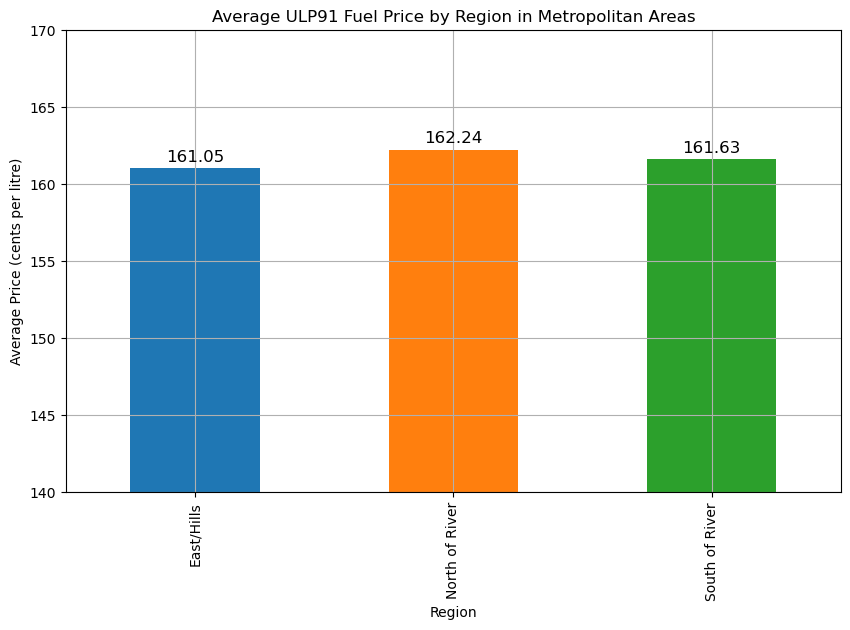

In [3]:
# Group the data by 'AREA_DESCRIPTION' and calculate the average price for each area
regional_price_comparison = data_cleaned.groupby('AREA_DESCRIPTION')['PRODUCT_PRICE'].mean()

# Plotting the regional price comparison

plt.figure(figsize=(10, 6))
bars = regional_price_comparison.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Set the y-axis range from 140 to 170
plt.ylim(140, 170)


for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.2f'), 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='center', 
                  size=12, xytext=(0, 8), 
                  textcoords='offset points')

plt.title('Average ULP91 Fuel Price by Region in Metropolitan Areas')
plt.xlabel('Region')
plt.ylabel('Average Price (cents per litre)')
plt.grid(True)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

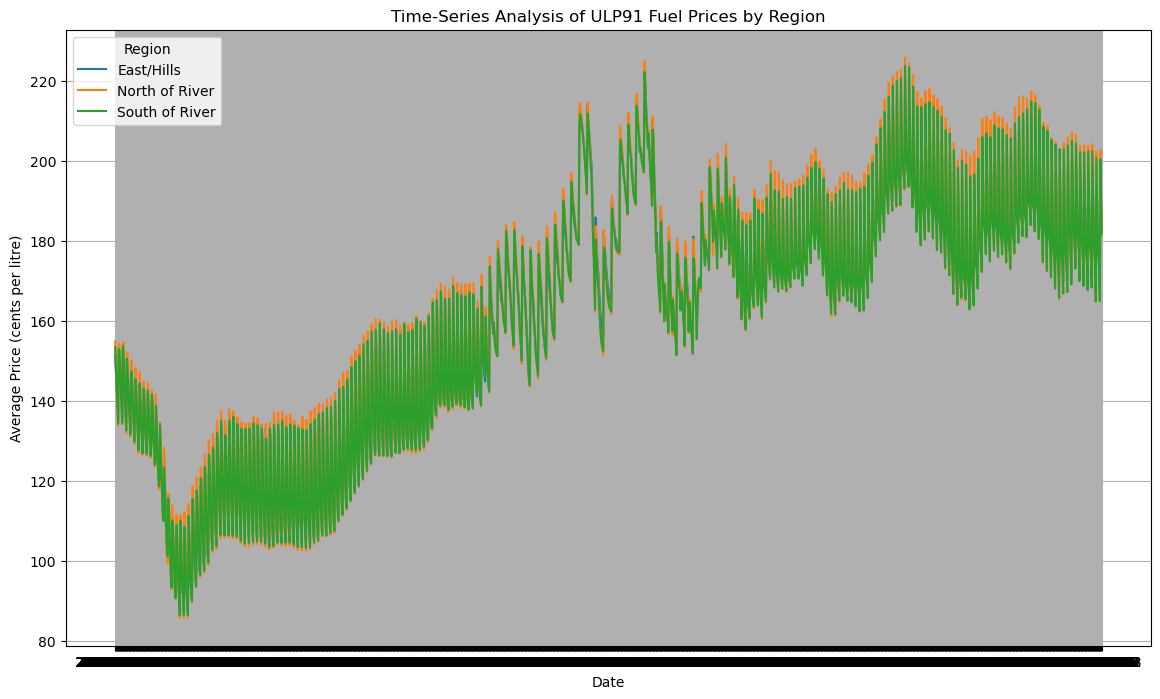

In [4]:
# Group the data by 'PUBLISH_DATE' and 'AREA_DESCRIPTION' to calculate daily average prices for each region
time_series_data = data_cleaned.groupby(['PUBLISH_DATE', 'AREA_DESCRIPTION'])['PRODUCT_PRICE'].mean().unstack()

# Plotting time-series graphs for each region
plt.figure(figsize=(14, 8))

# Plot for East/Hills
if 'East/Hills' in time_series_data.columns:
    plt.plot(time_series_data.index, time_series_data['East/Hills'], label='East/Hills', color='#1f77b4')

# Plot for North of River
if 'North of River' in time_series_data.columns:
    plt.plot(time_series_data.index, time_series_data['North of River'], label='North of River', color='#ff7f0e')

# Plot for South of River
if 'South of River' in time_series_data.columns:
    plt.plot(time_series_data.index, time_series_data['South of River'], label='South of River', color='#2ca02c')

plt.title('Time-Series Analysis of ULP91 Fuel Prices by Region')
plt.xlabel('Date')
plt.ylabel('Average Price (cents per litre)')
plt.legend(title='Region')
plt.grid(True)
plt.show

## Year by Year Weekly Average for all regions

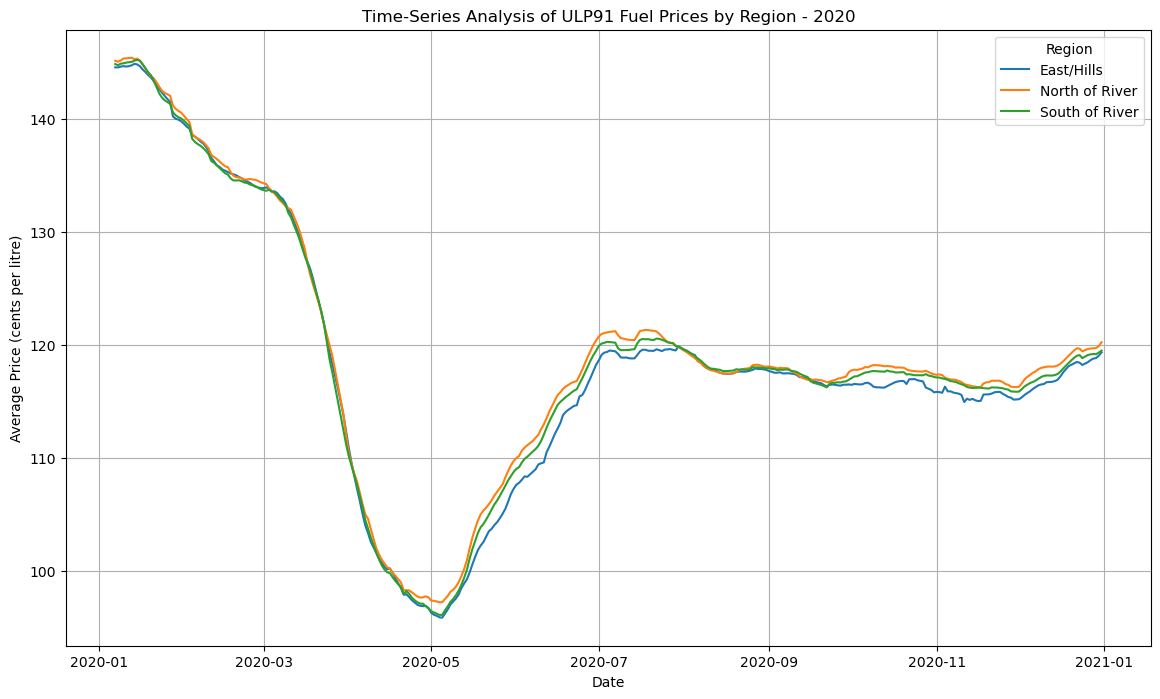

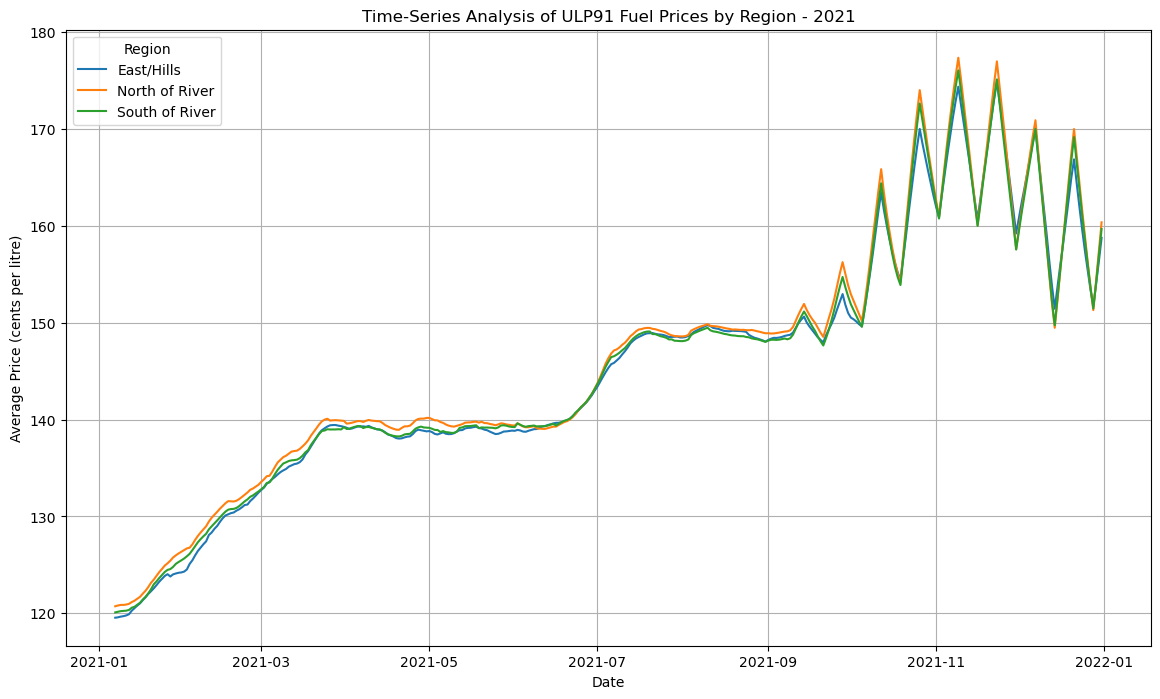

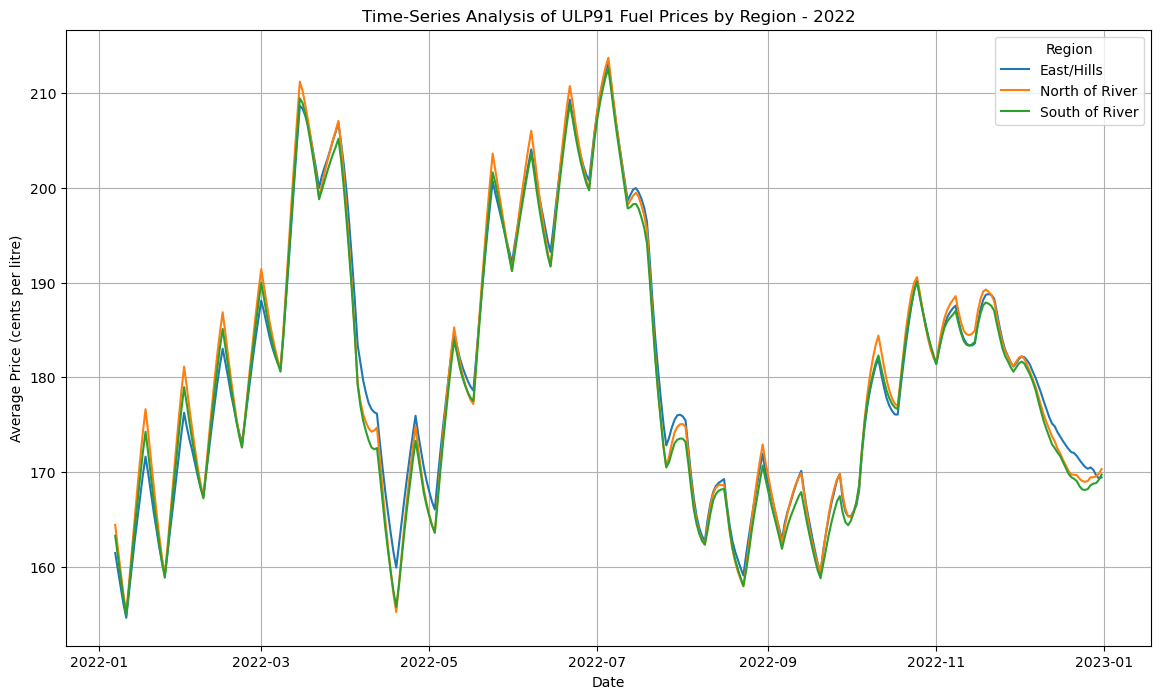

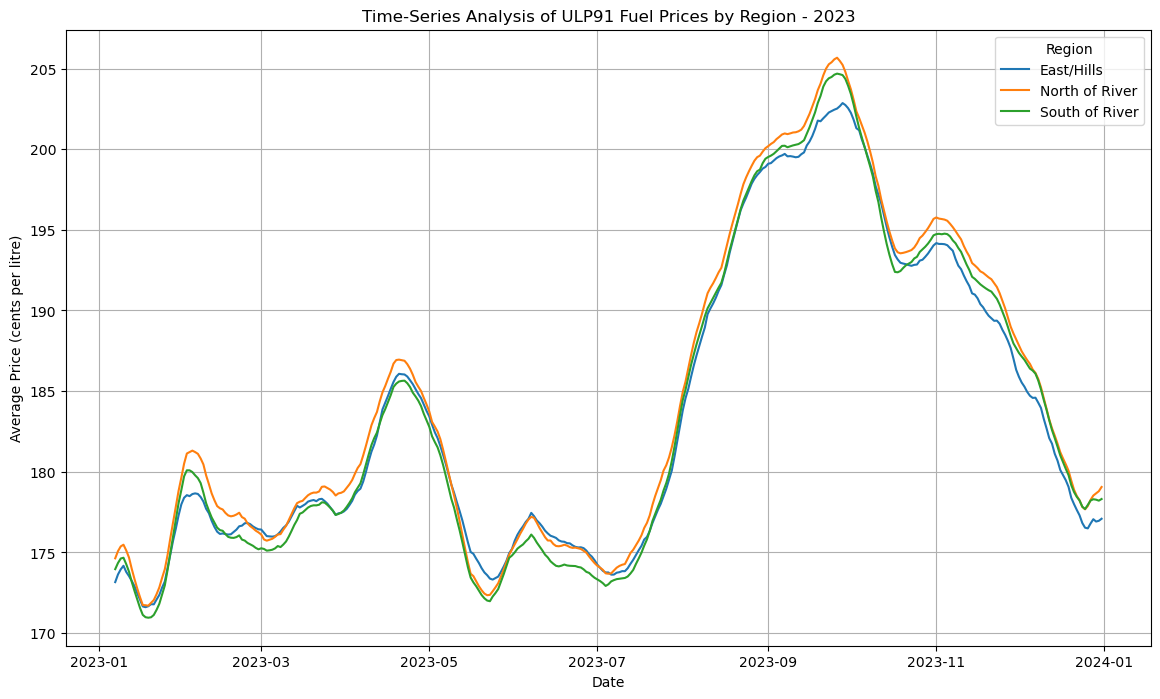

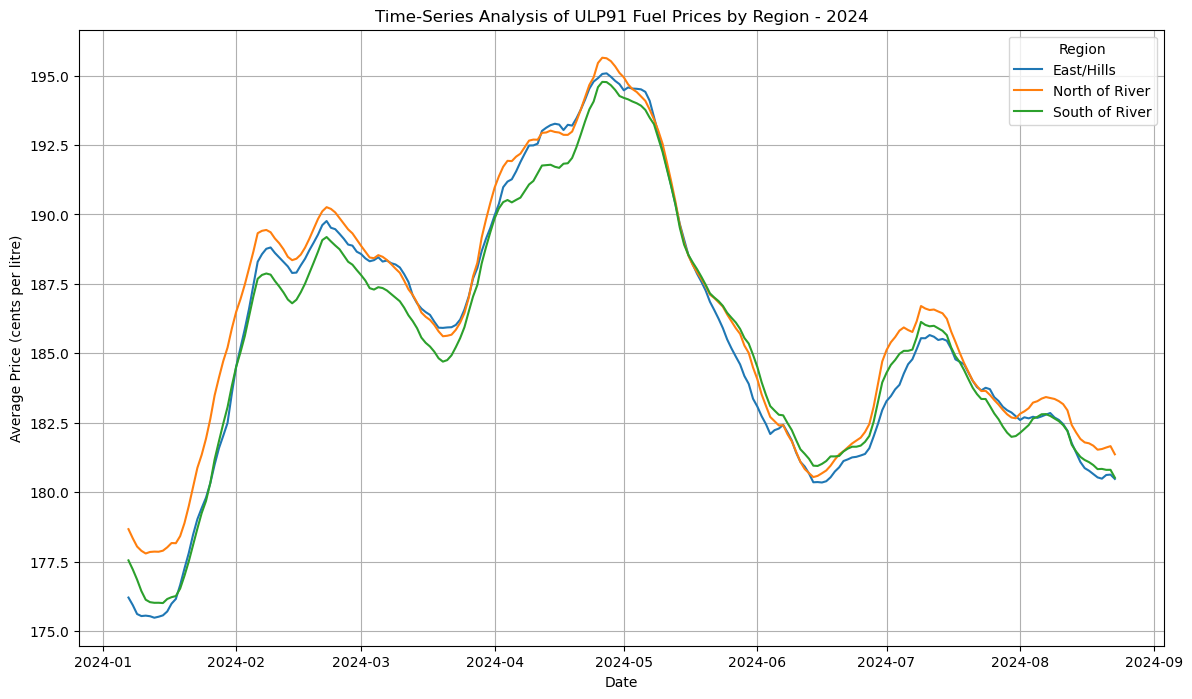

In [6]:
# Ensure your index is in datetime format
time_series_data.index = pd.to_datetime(time_series_data.index)

# Function to plot time-series data for a specific year
def plot_yearly_trends(year, data):
    # Filter data for the specified year
    yearly_data = data[data.index.year == year]
    
    # Apply a rolling average (7-day) to smooth the data
    rolling_data = yearly_data.rolling(window=7).mean()
    
    # Plotting time-series graphs for each region in the specified year
    plt.figure(figsize=(14, 8))

    if 'East/Hills' in rolling_data.columns:
        plt.plot(rolling_data.index, rolling_data['East/Hills'], label='East/Hills', color='#1f77b4')

    if 'North of River' in rolling_data.columns:
        plt.plot(rolling_data.index, rolling_data['North of River'], label='North of River', color='#ff7f0e')

    if 'South of River' in rolling_data.columns:
        plt.plot(rolling_data.index, rolling_data['South of River'], label='South of River', color='#2ca02c')

    plt.title(f'Time-Series Analysis of ULP91 Fuel Prices by Region - {year}')
    plt.xlabel('Date')
    plt.ylabel('Average Price (cents per litre)')
    plt.legend(title='Region')
    plt.grid(True)
    plt.show()

# Analyze all available years 
plot_yearly_trends(2020, time_series_data)
plot_yearly_trends(2021, time_series_data)
plot_yearly_trends(2022, time_series_data)
plot_yearly_trends(2023, time_series_data)
plot_yearly_trends(2024, time_series_data)


## Boxplots for each region in different years

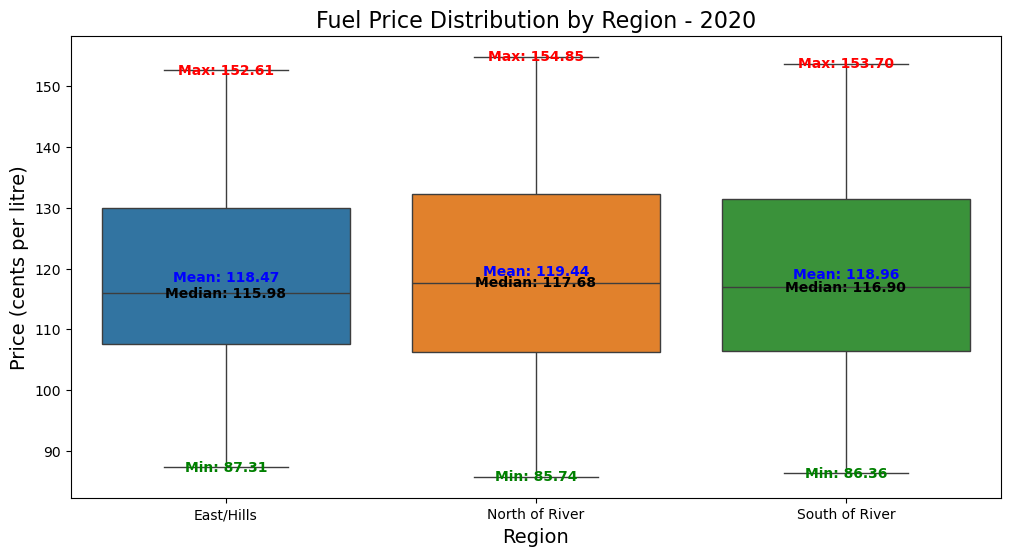

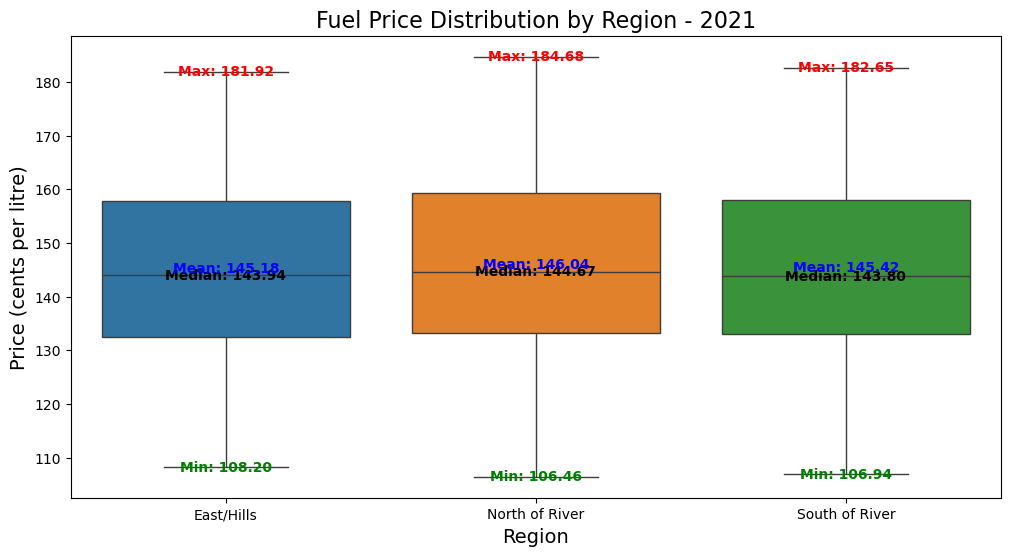

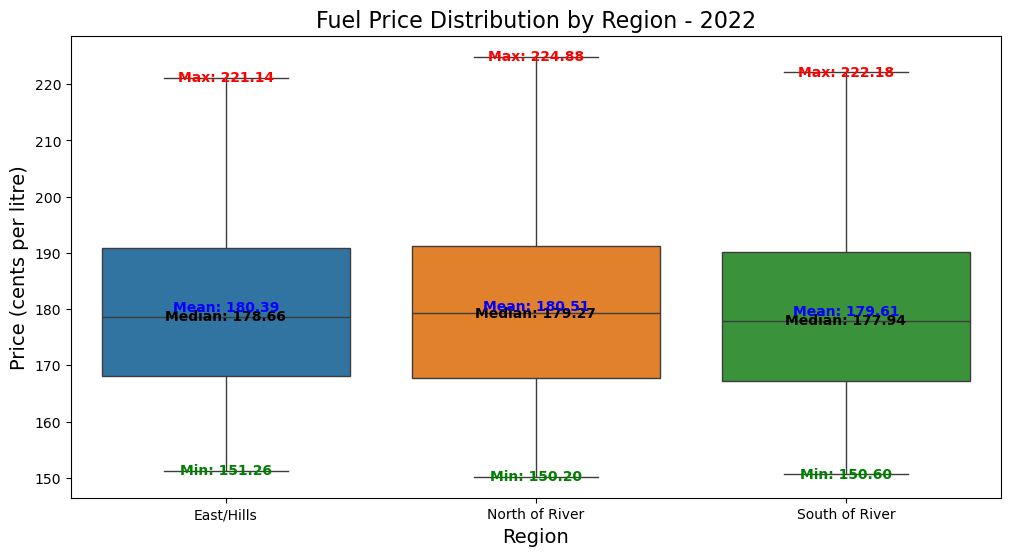

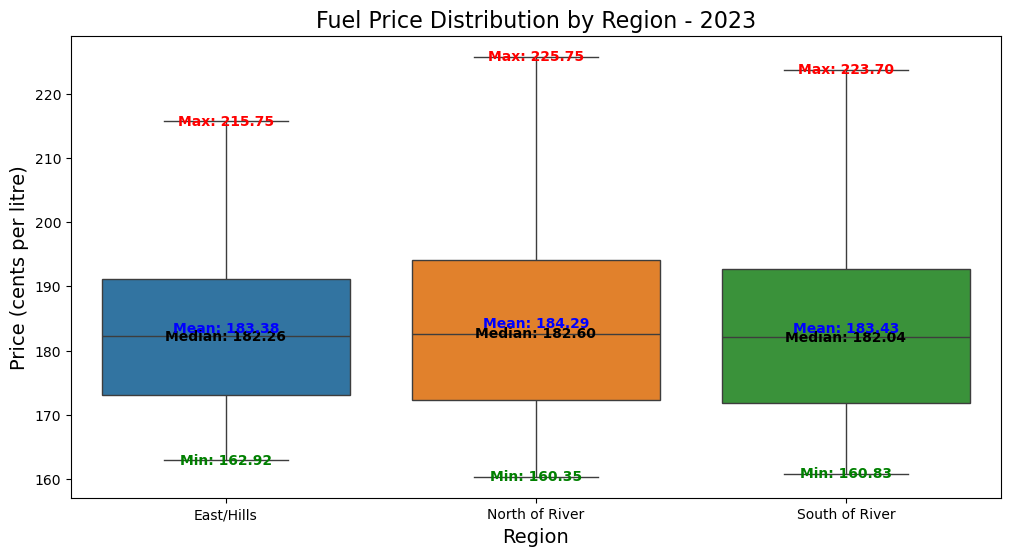

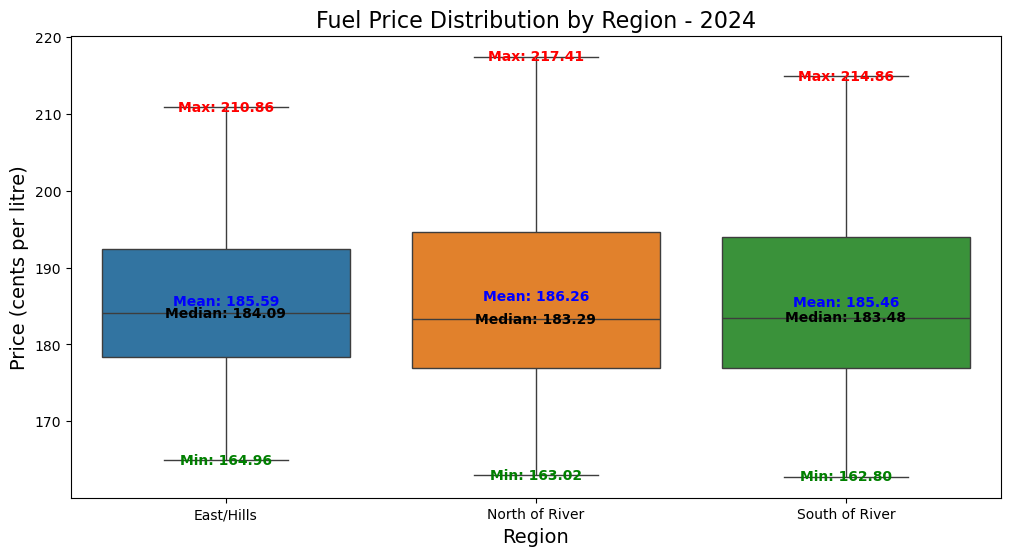

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create box plots for each year
def plot_price_distribution_for_each_year(data, start_year, end_year):
    # Ensure the index is in datetime format
    data.index = pd.to_datetime(data.index)
    
    # Loop through each year and plot
    for year in range(start_year, end_year + 1):
        yearly_data = data[data.index.year == year]
        
        plt.figure(figsize=(12, 6))
        
        # Creating the boxplot
        sns.boxplot(data=yearly_data[['East/Hills', 'North of River', 'South of River']])
        
        # Adding title and axis labels
        plt.title(f'Fuel Price Distribution by Region - {year}', fontsize=16)
        plt.ylabel('Price (cents per litre)', fontsize=14)
        plt.xlabel('Region', fontsize=14)
        
        # Calculating and annotating mean, median, min, max for each region
        regions = ['East/Hills', 'North of River', 'South of River']
        
        for i, region in enumerate(regions):
            region_data = yearly_data[region].dropna()
            if not region_data.empty:
                mean_val = region_data.mean()
                median_val = region_data.median()
                min_val = region_data.min()
                max_val = region_data.max()
                
                # Adding annotations to the plot
                plt.text(i, median_val, f'Median: {median_val:.2f}', horizontalalignment='center', verticalalignment='center', fontdict={'color': 'black', 'weight': 'bold'})
                plt.text(i, mean_val, f'Mean: {mean_val:.2f}', horizontalalignment='center', verticalalignment='center', fontdict={'color': 'blue', 'weight': 'bold'})
                plt.text(i, min_val, f'Min: {min_val:.2f}', horizontalalignment='center', verticalalignment='center', fontdict={'color': 'green', 'weight': 'bold'})
                plt.text(i, max_val, f'Max: {max_val:.2f}', horizontalalignment='center', verticalalignment='center', fontdict={'color': 'red', 'weight': 'bold'})
        
        # Display the plot
        plt.show()

# Call the function for years 2020 to 2024
plot_price_distribution_for_each_year(time_series_data, 2020, 2024)


## Average and Median monthly difference

C:\Users\User\AppData\Local\Temp\ipykernel_19244\1220579575.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  price_diff_east_vs_north = (data['East/Hills'] - data['North of River']).resample('M').mean()
C:\Users\User\AppData\Local\Temp\ipykernel_19244\1220579575.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  price_diff_east_vs_south = (data['East/Hills'] - data['South of River']).resample('M').mean()
C:\Users\User\AppData\Local\Temp\ipykernel_19244\1220579575.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  price_diff_north_vs_south = (data['North of River'] - data['South of River']).resample('M').mean()


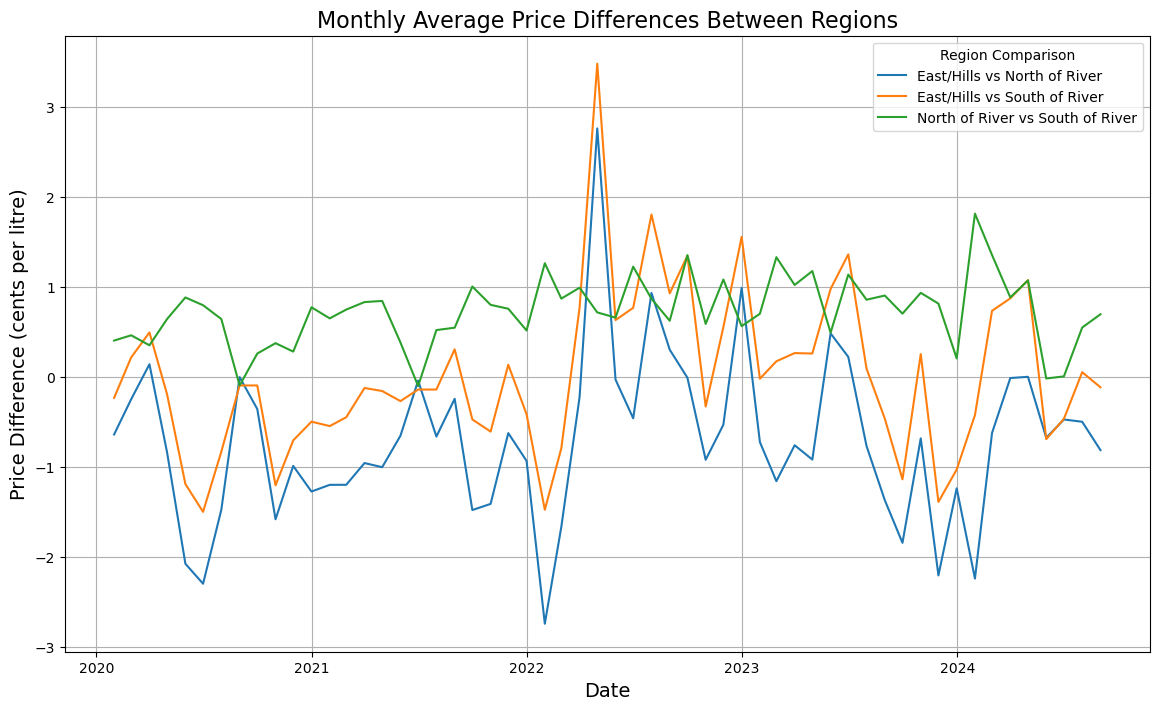

In [14]:
def plot_monthly_price_differences(data):
    # Resample the data monthly to get the mean difference
    price_diff_east_vs_north = (data['East/Hills'] - data['North of River']).resample('M').mean()
    price_diff_east_vs_south = (data['East/Hills'] - data['South of River']).resample('M').mean()
    price_diff_north_vs_south = (data['North of River'] - data['South of River']).resample('M').mean()
    
    # Plotting
    plt.figure(figsize=(14, 8))
    plt.plot(price_diff_east_vs_north.index, price_diff_east_vs_north, label='East/Hills vs North of River', color='#1f77b4')
    plt.plot(price_diff_east_vs_south.index, price_diff_east_vs_south, label='East/Hills vs South of River', color='#ff7f0e')
    plt.plot(price_diff_north_vs_south.index, price_diff_north_vs_south, label='North of River vs South of River', color='#2ca02c')
    
    plt.title('Monthly Average Price Differences Between Regions', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Price Difference (cents per litre)', fontsize=14)
    plt.legend(title='Region Comparison')
    plt.grid(True)
    plt.show()

# Call the function to plot monthly price differences
plot_monthly_price_differences(time_series_data)


C:\Users\User\AppData\Local\Temp\ipykernel_19244\1778960309.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  price_diff_east_vs_north = (data['East/Hills'] - data['North of River']).resample('M').median()
C:\Users\User\AppData\Local\Temp\ipykernel_19244\1778960309.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  price_diff_east_vs_south = (data['East/Hills'] - data['South of River']).resample('M').median()
C:\Users\User\AppData\Local\Temp\ipykernel_19244\1778960309.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  price_diff_north_vs_south = (data['North of River'] - data['South of River']).resample('M').median()


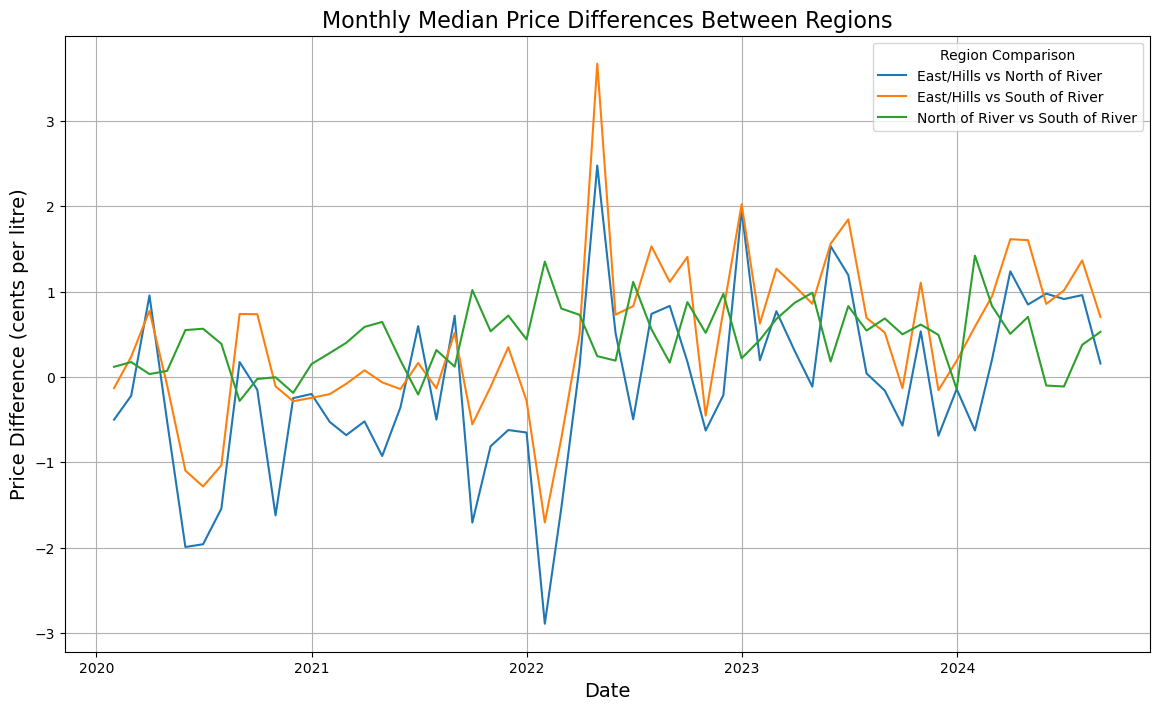

In [17]:
def plot_monthly_median_price_differences(data):
    # Resample the data monthly to get the median difference
    price_diff_east_vs_north = (data['East/Hills'] - data['North of River']).resample('M').median()
    price_diff_east_vs_south = (data['East/Hills'] - data['South of River']).resample('M').median()
    price_diff_north_vs_south = (data['North of River'] - data['South of River']).resample('M').median()
    
    # Plotting
    plt.figure(figsize=(14, 8))
    plt.plot(price_diff_east_vs_north.index, price_diff_east_vs_north, label='East/Hills vs North of River', color='#1f77b4')
    plt.plot(price_diff_east_vs_south.index, price_diff_east_vs_south, label='East/Hills vs South of River', color='#ff7f0e')
    plt.plot(price_diff_north_vs_south.index, price_diff_north_vs_south, label='North of River vs South of River', color='#2ca02c')
    
    plt.title('Monthly Median Price Differences Between Regions', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Price Difference (cents per litre)', fontsize=14)
    plt.legend(title='Region Comparison')
    plt.grid(True)
    plt.show()

# Call the function to plot monthly median price differences
plot_monthly_median_price_differences(time_series_data)


## Significant price differences plot


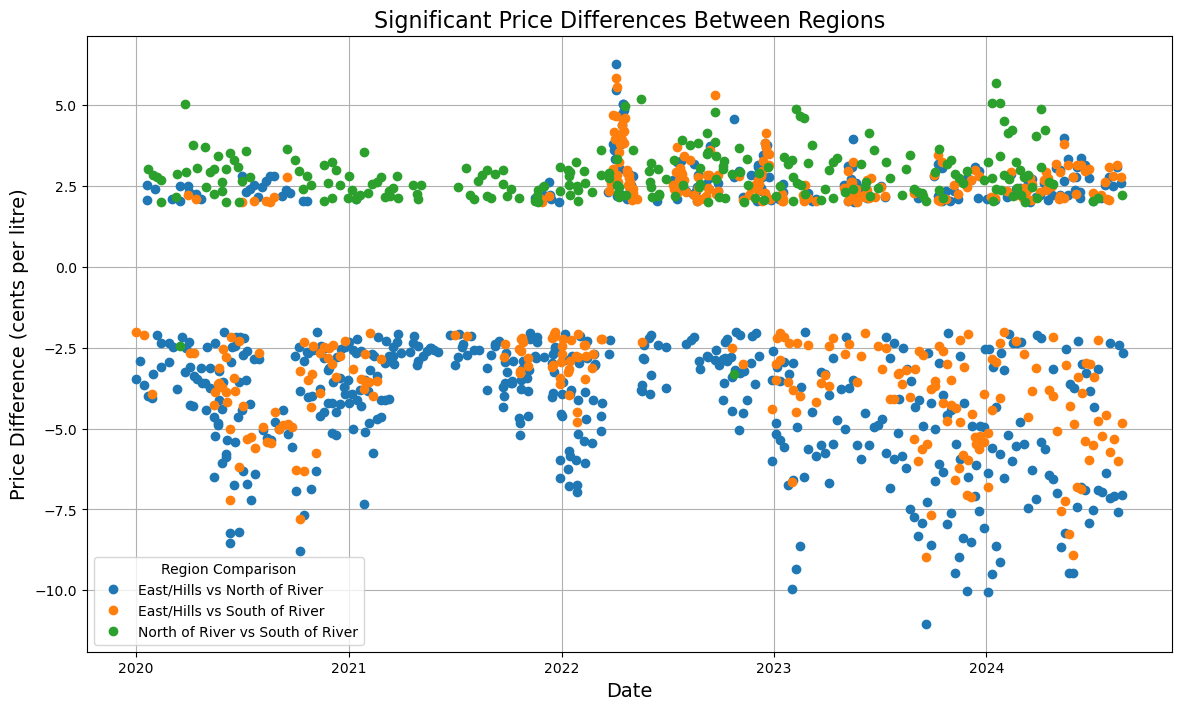

In [16]:
def plot_significant_price_differences(data, threshold=2):
    # Calculate price differences
    price_diff_east_vs_north = data['East/Hills'] - data['North of River']
    price_diff_east_vs_south = data['East/Hills'] - data['South of River']
    price_diff_north_vs_south = data['North of River'] - data['South of River']
    
    # Filter significant differences
    significant_east_vs_north = price_diff_east_vs_north[abs(price_diff_east_vs_north) > threshold]
    significant_east_vs_south = price_diff_east_vs_south[abs(price_diff_east_vs_south) > threshold]
    significant_north_vs_south = price_diff_north_vs_south[abs(price_diff_north_vs_south) > threshold]
    
    # Plotting
    plt.figure(figsize=(14, 8))
    plt.plot(significant_east_vs_north.index, significant_east_vs_north, 'o', label='East/Hills vs North of River', color='#1f77b4')
    plt.plot(significant_east_vs_south.index, significant_east_vs_south, 'o', label='East/Hills vs South of River', color='#ff7f0e')
    plt.plot(significant_north_vs_south.index, significant_north_vs_south, 'o', label='North of River vs South of River', color='#2ca02c')
    
    plt.title('Significant Price Differences Between Regions', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Price Difference (cents per litre)', fontsize=14)
    plt.legend(title='Region Comparison')
    plt.grid(True)
    plt.show()

# Call the function to plot only significant price differences (e.g., above 2 cents)
plot_significant_price_differences(time_series_data, threshold=2)


Overall Trends:
Above 0 Line: Dots that are above the 0 line represent instances where the first region in the comparison is more expensive than the second. For example, you can see that North of River (green) is more expensive than South of River quite frequently.
Below 0 Line: Dots below the 0 line represent the opposite, where the second region is more expensive. For instance, East/Hills vs North of River (blue) shows several instances where North of River has been more expensive than East/Hills (negative blue dots).

Significant Peaks and Troughs:
Peaks (Above +2.5 or +5): These indicate periods when one region's prices were significantly higher than the other, signaling potential factors like local demand spikes, supply issues, or external events.
For instance, you see clusters of blue and orange dots between 2021–2022 where East/Hills had notable price differences compared to the other regions.
Troughs (Below -2.5 or -5): These indicate periods when the second region in the comparison was significantly more expensive than the first.
The blue dots (East/Hills vs North of River) frequently dip below the -2.5 or -5 line, indicating that North of River was quite often more expensive than East/Hills.